#### Loading Packages

In [1]:
from sklearn.metrics import  make_scorer, accuracy_score
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import  classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import  accuracy_score
from sklearn import  preprocessing
import matplotlib.pylab as pylab 
import matplotlib.pyplot as plt
from pandas import  get_dummies
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import json
import sys
import csv
import os

In [2]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12, 8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

#### Exploratory Data Analysis (EDA)

In [3]:
path = 'D:\\kaggle\\Titanic\\'
df_train = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')

In [ ]:
type(df_train)

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


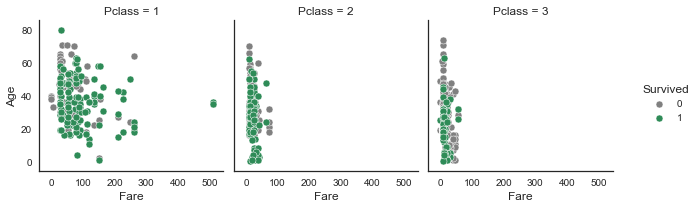

In [5]:
# Modify the graph above by assigning each species an individual color
g = sns.FacetGrid(df_train, hue='Survived', col='Pclass', margin_titles=True,
                 palette={1:'seagreen', 0:'gray'})
g = g.map(plt.scatter, 'Fare', 'Age', edgecolor='w').add_legend()

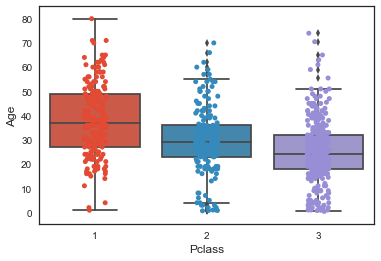

In [6]:
ax = sns.boxplot(x='Pclass', y='Age', data=df_train)
ax = sns.stripplot(x='Pclass', y='Age', data=df_train, jitter=True, edgecolor='gray')
plt.show()

<Figure size 432x288 with 0 Axes>

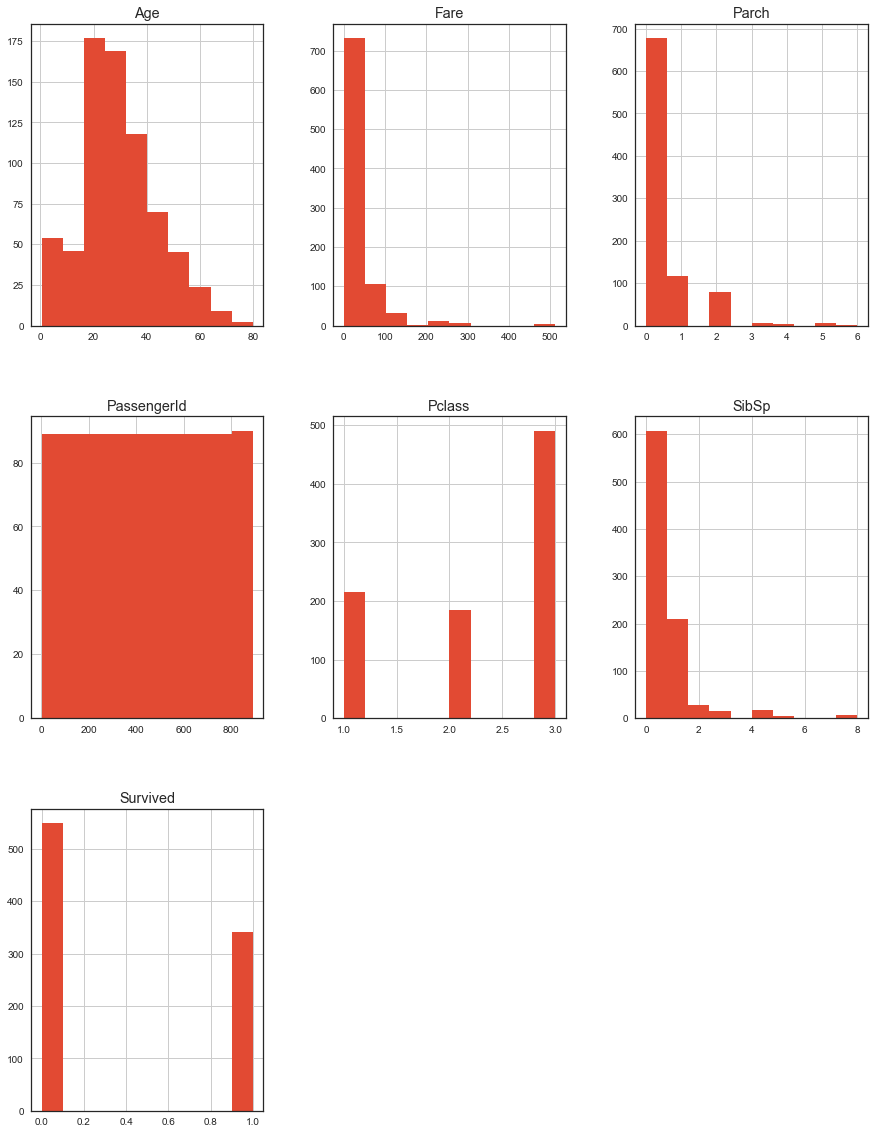

<Figure size 432x288 with 0 Axes>

In [7]:
df_train.hist(figsize=(15,20))
plt.figure()

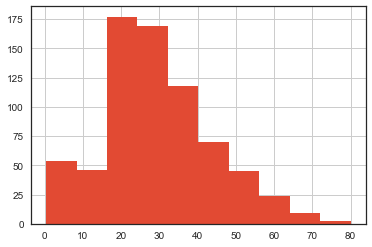

In [8]:
df_train['Age'].hist()

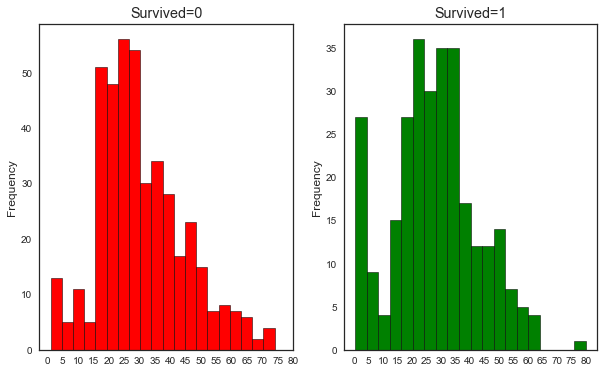

In [9]:
f, ax = plt.subplots(1,2,figsize=(10,6))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived=1')
x1=list(range(0,85,5))
ax[1].set_xticks(x1)
plt.show()

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train.Survived.value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [ ]:
pd.plotting.scatter_matrix(df_train, figsize=(10,10))
plt.figure()

In [ ]:
sns.violinplot(x='Sex', y='Age', data=df_train)

In [ ]:
f, ax = plt.subplots(1,2,figsize=(10,4))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [ ]:
sns.FacetGrid(df_train, hue='Survived', size=5).map(sns.kdeplot, 'Fare').add_legend()
plt.show()

In [ ]:
sns.jointplot(x='Fare', y='Age', data=df_train)

In [ ]:
sns.jointplot(x='Fare', y='Age', data=df_train, kind='reg')

In [ ]:
sns.swarmplot(x='Pclass', y='Age', data=df_train)


In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(df_train.corr(), annot=True, cmap='cubehelix_r')

In [ ]:
df_train.Pclass.value_counts().plot(kind='bar')

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train)

In [ ]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(df_train[df_train.Pclass==1].Fare, ax=ax[0])
ax[0].set_title('Fare in Pclass 1')
sns.distplot(df_train[df_train.Pclass==2].Fare, ax=ax[1])
ax[1].set_title('Fare in Pclass 2')
sns.distplot(df_train[df_train.Pclass==3].Fare, ax=ax[2])
ax[2].set_title('Fare in Pclass 3')

#### Data Cleaning

In [15]:
%%time
# VERY VERY VERY IMPORTANT
# We cannot emphasize too much to the importance of modularization and pipeline thoughts. 

import time

def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['LnamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

df_train = transform_features(df_train)
df_test = transform_features(df_test)
df_train.head()

Wall time: 34 ms


In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,LnamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


In [17]:
# transform category variables to numerical
# IMPORTANT: both train set and test set should be fitted and tranformed with the same function.
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'LnamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test


In [18]:
df_train, df_test = encode_features(df_train, df_test)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,LnamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


* **X==>>Feature**


 * **y==>>Target**

In [19]:
x_all = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = df_train['Survived']

num_test = .3
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=num_test, random_state=100)


#### Model Deployment

In [24]:
# %%time
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

MLA = [
    RandomForestClassifier(),
    xgb.XGBClassifier(),
    LogisticRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor()
]

# MLA_predict for comparing different algorithm's prediction
MLA_predict = pd.DataFrame()
MLA_predict['Survived'] = y_test.values

from time import time
MLA_columns = ['MLA Name', 'MLA Parameters', 'Prediction Score', 'MLA Prediction', 'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)
row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    start = time()
    alg.fit(X_train, y_train)
    alg_prediction = alg.predict(X_test)
    end = time()
    MLA_compare.loc[row_index, 'MLA Time'] = end - start
    MLA_compare.loc[row_index, 'MLA Prediction'] = alg_prediction
    MLA_predict[MLA_name] = alg_prediction
    alg_score = accuracy_score(y_test, alg_prediction)
    MLA_compare.loc[row_index, 'Prediction Score'] = alg_score
    row_index += 1

MLA_compare.sort_values(by='Prediction Score', ascending=False, inplace=True)
MLA_compare
    
    

,MLA Name,MLA Parameters,Prediction Score,MLA Prediction,MLA Time
1,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.824627,"[1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...",0.0430026
0,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.794776,"[1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...",0.0210013
2,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.794776,"[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, ...",0.00200009
3,DecisionTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",0.794776,"[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...",0.000999928
4,ExtraTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",0.742537,"[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...",0.000999928


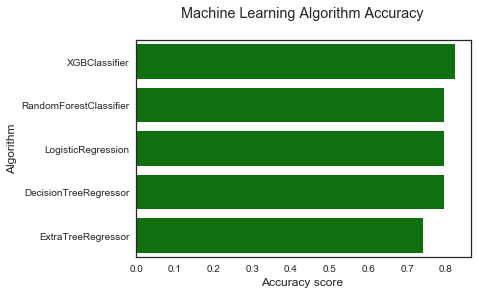

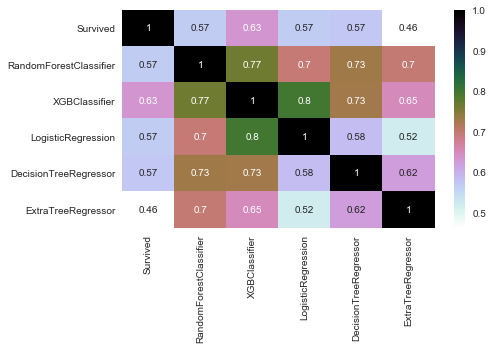

In [25]:
# MLA_predict.head()

# MLA_compare['MLA Parameters'][0]

sns.barplot(x='Prediction Score', y='MLA Name', data=MLA_compare, color='g')
plt.title('Machine Learning Algorithm Accuracy \n')
plt.xlabel('Accuracy score \n')
plt.ylabel('Algorithm')

# compare different algorithm prediction's correlation
plt.figure(figsize=(7,4))
sns.heatmap(MLA_predict.corr(), annot=True, cmap='cubehelix_r')

In [ ]:
rfc = RandomForestClassifier()

parameters = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt', 'auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(rfc, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

rfc = grid_obj.best_estimator_
rfc.fit(X_train, y_train)

In [ ]:
rfc_prediction = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_prediction)
print(rfc_score)

In [ ]:
xgboost = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=.05).fit(X_train, y_train)
xgb_prediction = xgboost.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_prediction)
print(xgb_score)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)
logreg_score = accuracy_score(y_test, logreg_prediction)
print(logreg_score)

In [ ]:


dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)
dt_score = accuracy_score(y_test, dt_prediction)
print(dt_score)

In [ ]:
from sklearn.linear_model import  HuberRegressor

huber = HuberRegressor()
huber.fit(X_train, y_train)
huber_prediction = huber.predict(X_test)
huber_score = accuracy_score(y_test, dt_prediction)
print(huber_score)